In [1]:
import cv2
import os
import numpy as np
import pandas as pd

ScaleTo = 70  # px to scale
seed = 7  # fixing random

# Path untuk membaca gambar
path = 'D:\MSIB 6 BISA AI ACADEMY\Plant Image'

# Membuat list gambar dan label
trainImg = []
trainLabel = []

# Mendapatkan list semua folder (nama tanaman)
folders = os.listdir(path)

# Menggunakan indeks untuk label tanaman
label_idx = {folder: idx for idx, folder in enumerate(folders)}

# Memuat gambar dan label dari setiap folder
for folder in folders:
    folder_path = os.path.join(path, folder)
    for img_file in os.listdir(folder_path):
        if img_file.endswith(('.png', '.jpg')):
            img_path = os.path.join(folder_path, img_file)
            img = cv2.resize(cv2.imread(img_path), (ScaleTo, ScaleTo))
            trainImg.append(img)
            trainLabel.append(label_idx[folder])
trainLabel = pd.DataFrame(trainLabel)

# Konversi ke array numpy
trainImg = np.array(trainImg)

In [2]:
# Menghitung jumlah gambar di setiap label
image_counts_per_label = trainLabel[0].value_counts().sort_index()

# Membuat list nama kelas sesuai dengan nama folder
class_names = folders

# Menampilkan jumlah gambar di setiap label dengan nama folder yang sesuai
for label_idx, count in image_counts_per_label.items():
    label_name = class_names[label_idx]
    print(f"Jumlah {label_name} : {count}")

Jumlah aquilegia : 27
Jumlah aster annual : 40
Jumlah aster perennial : 35
Jumlah Bell Pepper : 1
Jumlah Black-grass : 263
Jumlah calendula : 36
Jumlah campanula (bellflower) : 48
Jumlah Charlock : 390
Jumlah Cleavers : 287
Jumlah Common Chickweed : 611
Jumlah Common wheat : 221
Jumlah Corn : 1831
Jumlah cosmos : 47
Jumlah Fat Hen : 475
Jumlah iris : 45
Jumlah leucanthemum maximum (Shasta daisy) : 28
Jumlah lilium : 10
Jumlah Loose Silky-bent : 654
Jumlah Maize : 221
Jumlah passiflora : 11
Jumlah peony : 43
Jumlah phlox : 44
Jumlah rhododendron : 23
Jumlah rose : 46
Jumlah rudbeckia laciniata (Goldquelle) : 35
Jumlah Scentless Mayweed : 516
Jumlah Shepherds Purse : 231
Jumlah Small-flowered Cranesbill : 496
Jumlah snowdrop : 10
Jumlah Sugar beet : 385
Jumlah Tomato : 1
Jumlah tulip : 19
Jumlah veronica chamaedrys : 15
Jumlah viola : 30
Jumlah water lily : 11


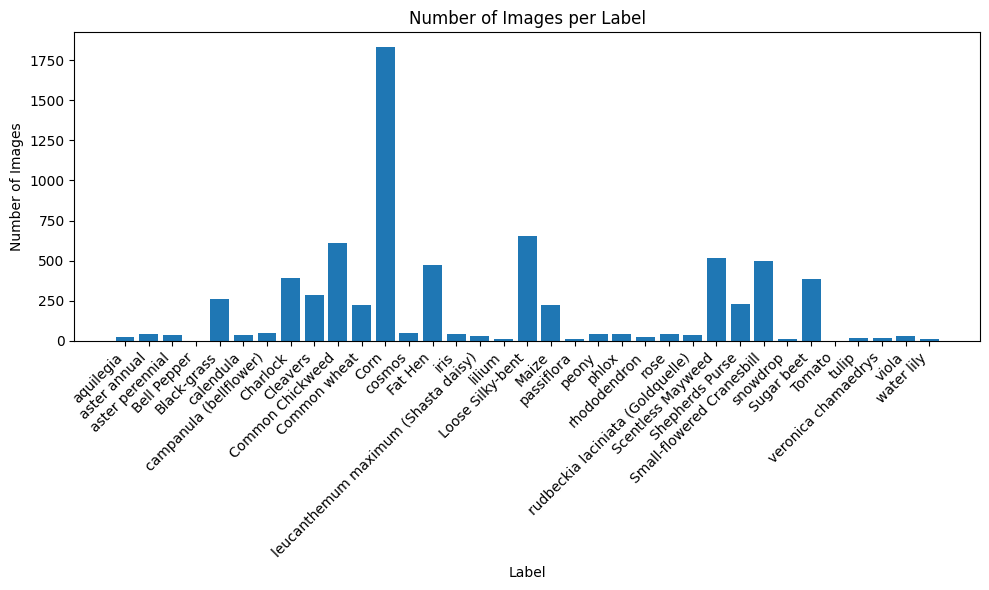

In [3]:
import matplotlib.pyplot as plt

# Menghitung jumlah gambar di setiap label
image_counts_per_label = trainLabel[0].value_counts().sort_index()

# Filter class_names untuk hanya menyertakan label yang ada dalam trainLabel
class_names_filtered = [class_names[label] for label in image_counts_per_label.index]

# Menampilkan visualisasi jumlah gambar di setiap label
plt.figure(figsize=(10, 6))
plt.bar(class_names_filtered, image_counts_per_label)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Number of Images per Label')
plt.tight_layout()
plt.show()


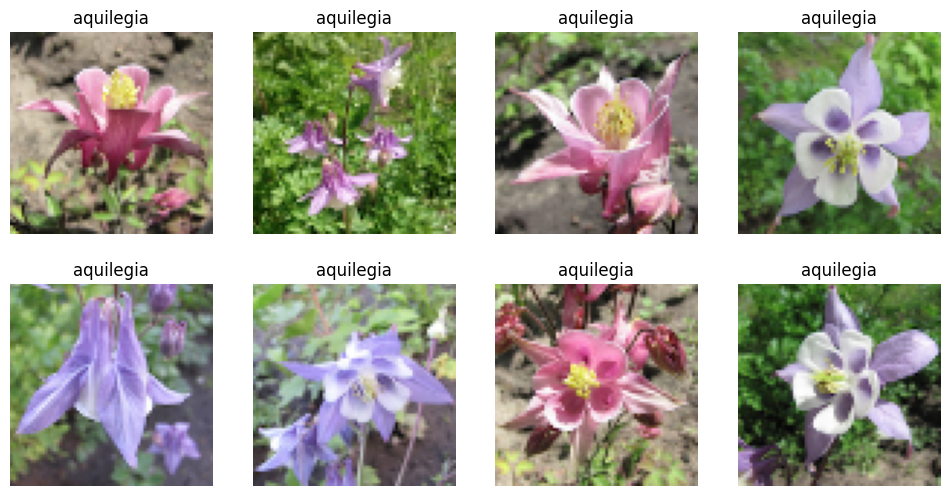

In [4]:
# Menampilkan contoh gambar
import matplotlib.pyplot as plt

num_examples = 8
plt.figure(figsize=(12, 6))
for i in range(num_examples):
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv2.cvtColor(trainImg[i], cv2.COLOR_BGR2RGB))
    plt.title(folders[trainLabel.iloc[i][0]])  # Menampilkan label tanaman
    plt.axis('off')
plt.show()

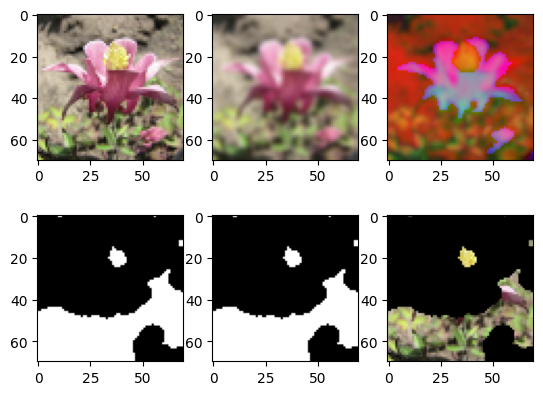

In [5]:
import matplotlib.pyplot as plt

# Inisialisasi list untuk menyimpan gambar-gambar yang telah dibersihkan
clearTrainImg = []

# Inisialisasi variabel untuk menyimpan contoh-contoh gambar
examples = []
getEx = True

# Loop untuk membersihkan setiap gambar dalam trainImg
for img in trainImg:
    # Gunakan gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)

    # Konversi gambar ke format HSV
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)

    # Buat mask (parameter - rentang warna hijau)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Buat mask boolean
    bMask = mask > 0

    # Terapkan mask
    clear = np.zeros_like(img, np.uint8)  # Buat gambar kosong
    clear[bMask] = img[bMask]  # Terapkan mask boolean ke gambar asli

    clearTrainImg.append(clear)  # Tambahkan gambar tanpa latar belakang

    # Tampilkan contoh-contoh gambar
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Tampilkan gambar asli
        plt.subplot(2, 3, 2); plt.imshow(cv2.cvtColor(blurImg, cv2.COLOR_BGR2RGB))  # Tampilkan gambar yang di-blur
        plt.subplot(2, 3, 3); plt.imshow(cv2.cvtColor(hsvImg, cv2.COLOR_BGR2RGB))  # Tampilkan gambar dalam format HSV
        plt.subplot(2, 3, 4); plt.imshow(mask, cmap='gray')  # Tampilkan mask
        plt.subplot(2, 3, 5); plt.imshow(bMask, cmap='gray')  # Tampilkan mask boolean
        plt.subplot(2, 3, 6); plt.imshow(cv2.cvtColor(clear, cv2.COLOR_BGR2RGB))  # Tampilkan gambar tanpa latar belakang
        plt.show()
        getEx = False

# Konversi ke array numpy
clearTrainImg = np.asarray(clearTrainImg)


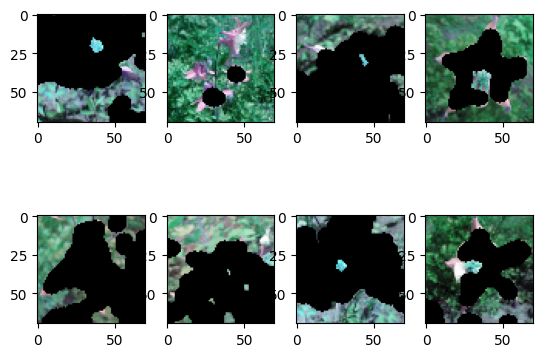

In [6]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearTrainImg[i])

In [7]:
clearTrainImg = clearTrainImg / 255

In [14]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Encode labels
le = LabelEncoder()
encodeTrainLabels = le.fit_transform(trainLabel[0])
num_classes = len(folders)  

# Convert labels to categorical format
clearTrainLabel = to_categorical(encodeTrainLabels, num_classes=num_classes)



In [15]:
from sklearn.model_selection import train_test_split
# Bagi data menjadi data pelatihan dan pengujian
trainX, testX, trainY, testY = train_test_split(clearTrainImg, clearTrainLabel,
                                                test_size=0.1, random_state=seed)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy

numpy.random.seed(seed)  # Fix seed
num_classes = len(folders)

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(ScaleTo, ScaleTo, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten(input_shape=(70, 70, 3)))  # Input layer
model.add(Dense(128, activation='relu'))     # Hidden layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 66, 66, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 66, 66, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 31, 31, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 27, 27, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 27, 27, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 23, 23, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 256)      │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 41)             │         5,289 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        10,75

 Total params: 3,310,994 (12.63 MB)

 Trainable params: 3,308,178 (12.62 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [17]:
# Fit model
history = model.fit(trainX, trainY, batch_size=32, epochs=35, validation_data=(testX, testY))

# Evaluate model
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 3085s 15s/step - accuracy: 0.2756 - loss: 3.2724 - val_accuracy: 0.0445 - val_loss: 3.2292
Epoch 2/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 1339s 7s/step - accuracy: 0.4327 - loss: 2.0051 - val_accuracy: 0.2990 - val_loss: 2.4011
Epoch 3/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 1312s 6s/step - accuracy: 0.5017 - loss: 1.6753 - val_accuracy: 0.3727 - val_loss: 2.4036
Epoch 4/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 1960s 10s/step - accuracy: 0.5412 - loss: 1.5278 - val_accuracy: 0.5313 - val_loss: 1.8404
Epoch 5/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 2144s 11s/step - accuracy: 0.5783 - loss: 1.3444 - val_accuracy: 0.5563 - val_loss: 1.7283
Epoch 6/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 2324s 11s/step - accuracy: 0.6205 - loss: 1.2496 - val_accuracy: 0.5730 - val_loss: 1.8757
Epoch 7/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 2185s 11s/step - accuracy: 0.6426 - loss: 1.1859 - val_accuracy: 0.5911 - val_loss: 1.4062
Epoch 8/35
203/203 ━━━━━━━━━━━━━━━━━━━━ 2009s 10s/step - accuracy: 0.6698 - loss: 1.1

In [18]:
from keras.models import save_model
# Simpan model ke file H5
save_model(model, 'plant_image_recognition.h5')


In [1]:
from keras.models import load_model

# Muat model dari file H5
model = load_model('plant_image_recognition.h5')

# Verifikasi model sudah berhasil dimuat
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 66, 66, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 66, 66, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 31, 31, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 27, 27, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 27, 27, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 23, 23, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 256)      │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 41)             │         5,289 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        10,75

 Total params: 3,310,996 (12.63 MB)

 Trainable params: 3,308,178 (12.62 MB)

 Non-trainable params: 2,816 (11.00 KB)

 Optimizer params: 2 (12.00 B)